In [1]:
"""
# Sao Paulo, Aug 14, 2020
# Script to check uscleanpat_exclude_selficit.csv
# When running graph_tool with this file, some results showed uuid in the place of pat_id
# this is to check if the data is consistent

13 million results looks small
"""

'\n# Sao Paulo, Aug 14, 2020\n# Script to check uscleanpat_exclude_selficit.csv\n# When running graph_tool with this file, some results showed uuid in the place of pat_id\n# this is to check if the data is consistent\n\n13 million results looks small\n'

In [2]:
import sys
sys.path.append('/home/rkogeyam/scripts/')
from sampler import sampler

import pandas as pd
import numpy as np
import re
import datetime

import matplotlib.pyplot as plt


In [3]:
# uspatentcitation.tsv
# uuid:         unique id
# patent_id:    patent number
# citation_id:  identifying number of patent to which select patent cites
# date:         date select patent (patent_id) cites patent (citation_id)
# name:         name of cited record
# kind:         WIPO document kind codes 
#               (http://www.uspto.gov/learning-and-resources/support-centers/electronic-business-center/kind-codes-included-uspto-patent)	2002 and After
# country:      country cited patent was granted (always US)
# category:     who cited the patent (examiner, applicant, other etc) - 2002 and After
# sequence:     order in which this reference is cited by select patent	all


In [4]:
src= r'/home/rkogeyam/PATENT_CITATION/data/centrality_pagerank_selfcit.csv'
# dst= '/home/rkogeyam/PATENT_CITATION/data/cleanuspatentcitation.csv'


In [5]:
df=pd.read_csv(src, dtype={'id':object,'pagerank':float })

In [6]:
df.dtypes

id           object
pagerank    float64
dtype: object

In [7]:
df['id'] = df['id'].astype(str) #type object may contain mixed types

In [8]:
df[df['id'].apply(lambda x: len(x)>7)]

,id,pagerank
80,10290620,4.069354e-08
81,10290621,4.069354e-08
82,10290622,4.069354e-08
83,10290623,4.069354e-08
84,10290625,4.069354e-08
85,10290627,4.069354e-08
86,10290628,4.069354e-08
87,10290629,4.069354e-08
114,10456556,4.069354e-08
115,10456557,4.069354e-08


In [9]:
df[df['id'].apply(lambda x: len(x)<7)]

,id,pagerank
1,nan,1.569009e-06
60,D88358,4.419625e-08
77,D88359,5.183561e-08
213,353851,4.241277e-08
219,PP9098,4.501722e-08
220,PP9099,4.934091e-08
221,PP9096,4.069354e-08
222,PP9097,4.069354e-08
223,PP9094,9.257776e-08
225,PP9092,4.069354e-08


In [10]:
df.id.str.len().value_counts()

7     8386746
8      508282
6      259468
11      76617
5       17595
4        2484
9        1203
3         213
12         38
2          25
10         23
1           7
15          1
13          1
Name: id, dtype: int64

In [11]:
# pat='data/uspatclean_selfcit.csv'
# df=pd.read_csv(pat)
# df.dtypes

In [12]:
# df.uuid.str.len().value_counts()

In [13]:
# pat='data/only_uuid_pat_cit.csv'
# df=pd.read_csv(pat)
# df.dtypes
# df.uuid.str.len().value_counts()


In [14]:
# self_cit='data/self_cit.csv'
# df=pd.read_csv(self_cit)
# df.dtypes
# df.uuid.str.len().value_counts()


In [15]:
# ax=df['pagerank'].hist()
# ax.set_title('PageRank Histogram \n')
# plt.show()

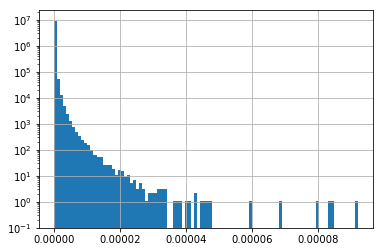

In [16]:
series = df['pagerank']
fig, ax = plt.subplots()
series.hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')
plt.show()

In [17]:
df['pagerank'].nlargest(15)

4970916    0.000092
7221853    0.000084
5738588    0.000084
7098349    0.000080
4602059    0.000068
5622967    0.000059
6626884    0.000048
4583642    0.000046
2317760    0.000046
7299091    0.000045
3491535    0.000043
1340422    0.000043
1344240    0.000041
2685700    0.000040
2315530    0.000039
Name: pagerank, dtype: float64